In [1]:
# Sort this list WITHOUT using any functions.

test = [4,123,41,56,8,990,12,33,45,93]

In [2]:
greater = []
lower = []

for number in test:
    pivot = test[-1]
    if number > pivot:
        greater.append(number)
    else: 
        lower.append(number)

In [3]:
greater

[123, 990]

In [4]:
lower

[4, 41, 56, 8, 12, 33, 45, 93]

# Module 3

In [5]:
# Working with XMLs

xml_data = '''
<transactions>
    <transaction>
        <id>1</id>
        <product>iPhone</product>
        <price>980</price>
        <qty>10</qty>
    </transaction>
    <transaction>
        <id>2</id>
        <product>Macbook</product>
        <price>3999</price>
        <qty>3</qty>
    </transaction>
</transactions>
'''

In [6]:
import pandas as pd
import xml.etree.ElementTree as ET # To parse the XML structure

root = ET.fromstring(xml_data)

In [7]:
# Extract the data

data = []

for element in root.findall("transaction"):
    transaction_data = {
        'transaction_id' :element.find("id").text,
        'product' :element.find("product").text,
        'qty' :int(element.find("qty").text),
        'price' :float(element.find("price").text)
    }
    data.append(transaction_data)

print(data)
    

[{'transaction_id': '1', 'product': 'iPhone', 'qty': 10, 'price': 980.0}, {'transaction_id': '2', 'product': 'Macbook', 'qty': 3, 'price': 3999.0}]


In [8]:
# Turning it into DF
df = pd.DataFrame(data)
df.head()

,transaction_id,product,qty,price
0,1,iPhone,10,980.0
1,2,Macbook,3,3999.0


In [9]:
df['order_total'] = df['qty']*df['price']
df

,transaction_id,product,qty,price,order_total
0,1,iPhone,10,980.0,9800.0
1,2,Macbook,3,3999.0,11997.0


# JSON

In [10]:
import requests
import json

In [22]:
# API Endpoint
url = 'https://meowfacts.herokuapp.com/?count=20'

In [23]:
# GET request
response = requests.get(url)

In [24]:
# Checking if the request was successful:
if response.status_code == 200:
    # Parse the response as JSON
    data = response.json()
    print("Response from API: ", response.status_code)
    print(data)
else:
    print(f"The request failed with the status code: {response.status_code}")

Response from API:  200
{'data': ['Cats can get tapeworms from eating mice. If your cat catches a mouse it is best to take the prize away from it.', "Cats can get tapeworms from eating fleas. These worms live inside the cat forever, or until they are removed with medication. They reproduce by shedding a link from the end of their long bodies. This link crawls out the cat's anus, and sheds hundreds of eggs. These eggs are injested by flea larvae, and the cycles continues. Humans may get these tapeworms too, but only if they eat infected fleas. Cats with tapeworms should be dewormed by a veterinarian.", 'Abraham Lincoln loved cats. He had four of them while he lived in the White House.', 'Studies now show that the allergen in cats is related to their scent glands. Cats have scent glands on their faces and at the base of their tails. Entire male cats generate the most scent. If this secretion from the scent glands is the allergen, allergic people should tolerate spayed female cats the bes

In [25]:
# Pretifying the JSON output
facts = data.get("data", [])
print(facts)

['Cats can get tapeworms from eating mice. If your cat catches a mouse it is best to take the prize away from it.', "Cats can get tapeworms from eating fleas. These worms live inside the cat forever, or until they are removed with medication. They reproduce by shedding a link from the end of their long bodies. This link crawls out the cat's anus, and sheds hundreds of eggs. These eggs are injested by flea larvae, and the cycles continues. Humans may get these tapeworms too, but only if they eat infected fleas. Cats with tapeworms should be dewormed by a veterinarian.", 'Abraham Lincoln loved cats. He had four of them while he lived in the White House.', 'Studies now show that the allergen in cats is related to their scent glands. Cats have scent glands on their faces and at the base of their tails. Entire male cats generate the most scent. If this secretion from the scent glands is the allergen, allergic people should tolerate spayed female cats the best.', 'Many people fear catching a

In [26]:
for i, cat_fact in enumerate(facts, start=1):
    print(f'{i}. {cat_fact}')

1. Cats can get tapeworms from eating mice. If your cat catches a mouse it is best to take the prize away from it.
2. Cats can get tapeworms from eating fleas. These worms live inside the cat forever, or until they are removed with medication. They reproduce by shedding a link from the end of their long bodies. This link crawls out the cat's anus, and sheds hundreds of eggs. These eggs are injested by flea larvae, and the cycles continues. Humans may get these tapeworms too, but only if they eat infected fleas. Cats with tapeworms should be dewormed by a veterinarian.
3. Abraham Lincoln loved cats. He had four of them while he lived in the White House.
4. Studies now show that the allergen in cats is related to their scent glands. Cats have scent glands on their faces and at the base of their tails. Entire male cats generate the most scent. If this secretion from the scent glands is the allergen, allergic people should tolerate spayed female cats the best.
5. Many people fear catching 

In [27]:
json_output = json.dumps(data, indent=5)
print(json_output)

{
     "data": [
          "Cats can get tapeworms from eating mice. If your cat catches a mouse it is best to take the prize away from it.",
          "Cats can get tapeworms from eating fleas. These worms live inside the cat forever, or until they are removed with medication. They reproduce by shedding a link from the end of their long bodies. This link crawls out the cat's anus, and sheds hundreds of eggs. These eggs are injested by flea larvae, and the cycles continues. Humans may get these tapeworms too, but only if they eat infected fleas. Cats with tapeworms should be dewormed by a veterinarian.",
          "Abraham Lincoln loved cats. He had four of them while he lived in the White House.",
          "Studies now show that the allergen in cats is related to their scent glands. Cats have scent glands on their faces and at the base of their tails. Entire male cats generate the most scent. If this secretion from the scent glands is the allergen, allergic people should tolerate spa

In [28]:
data['data'][3]

'Studies now show that the allergen in cats is related to their scent glands. Cats have scent glands on their faces and at the base of their tails. Entire male cats generate the most scent. If this secretion from the scent glands is the allergen, allergic people should tolerate spayed female cats the best.'

## HTTP Rules to Remember:

HTTP Methods:

1. POST - adding new data
2. GET - retrieving data
3. PUT/PATCH - modifying data
4. DELETE - remove data

HTTP Response Codes:

- 1xx - Informational
- 2xx - Sucess 
- 3xx - Redirection
- 4xx - Client Error (Error on our end)
- 5xx - Server Error (Error on their part)

## JSON Rules to remember

1. Keys are always in double quotes.
2. Valid dtypes: string, number, boolean, null, object and array.
3. No trailing commas available (don't do this: [1,2,3,])
4. The default encoding for APIs is UTF-8.
5. No comments allowed. 

## JSON library cheat sheet 

- json.loads()
    - Parsing a JSON string to a Python object. 
- json.dumps()
    - Converts Python objects to JSON string with indentation if needed. 
- json.load()
    - Reading JSON from a file to a python object.
- json.dump()
    - Writing python objects to a file.

## Requests library cheat sheet

- requests.get(url)
- requests.post(url, json=data)
- requests.patch(url, json=data)
- requests.put(url, json=data)
- requests.delete(url)



In [32]:
from PIL import Image
import matplotlib.pyplot as plt

url = 'https://place.dog/300/200'

response = requests.get(url)

Matplotlib is building the font cache; this may take a moment.


In [30]:
with open("download.jpeg", "wb") as f:
    f.write(response.content)

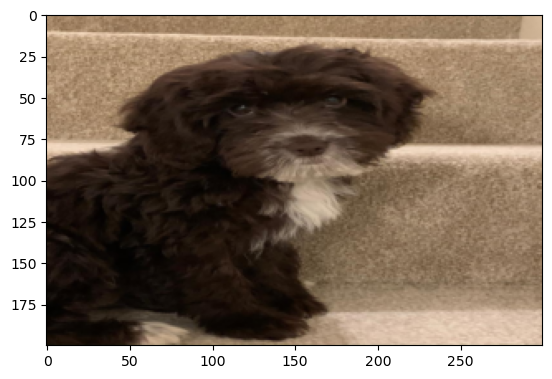

In [35]:
img = Image.open("download.jpeg")
plt.imshow(img)
plt.show()

# Pandas Data Transformationm

In [38]:
# Importing JSON data
import pandas as pd

with open('dataset.json', 'r') as file:
    data = json.load(file)

In [40]:
data

[{'sale_id': 1, 'product': 't-shirt', 'price': 12.99, 'size': 'M'},
 {'sale_id': 2, 'product': 'jeans', 'price': 14.99, 'size': 'L'},
 {'sale_id': 3, 'product': 'jacket', 'price': 19.99, 'size': 'L'},
 {'sale_id': 4, 'product': 'jeans', 'price': 11.99, 'size': 'S'},
 {'sale_id': 5, 'product': 't-shirt', 'price': 9.99, 'size': 'XL'}]

In [43]:
# Interlude: Series vs Dataframes

names = ["Nirosh", "Vincent", "Ben", "Sarah"]

myFirstSeries = pd.Series(names)

print(myFirstSeries)
print(myFirstSeries[2])

0     Nirosh
1    Vincent
2        Ben
3      Sarah
dtype: object
Ben


In [46]:
# Turning our JSON data into a Dataframe
df = pd.DataFrame(data)
df

,sale_id,product,price,size
0,1,t-shirt,12.99,M
1,2,jeans,14.99,L
2,3,jacket,19.99,L
3,4,jeans,11.99,S
4,5,t-shirt,9.99,XL


Things you'd like to see in Pandas: 

- Value of the most expensive product
- Applying Lambda Functions (Advanced)
- SUM, COUNT etc
- Memory and Compute Implications/Statistics

In [ ]:
df.info()

In [49]:
df.describe()

,sale_id,price
count,5.000000,5.000000
mean,3.000000,13.990000
std,1.581139,3.807887
min,1.000000,9.990000
25%,2.000000,11.990000
50%,3.000000,12.990000
75%,4.000000,14.990000
max,5.000000,19.990000


In [50]:
df

,sale_id,product,price,size
0,1,t-shirt,12.99,M
1,2,jeans,14.99,L
2,3,jacket,19.99,L
3,4,jeans,11.99,S
4,5,t-shirt,9.99,XL


In [54]:
row = df.loc[df.price.idxmax(),:]
row

sale_id         3
product    jacket
price       19.99
size            L
Name: 2, dtype: object

In [ ]:
df.loc[df['product'] == "jeans", :]

,sale_id,product,price,size
1,2,jeans,14.99,L
3,4,jeans,11.99,S


In [61]:
# Applying Conditional Functions

##Easy Way:
df["price_with_VAT"] = round(df.price * 1.2, 2)
df

,sale_id,product,price,size,price_with_VAT
0,1,t-shirt,12.99,M,15.59
1,2,jeans,14.99,L,17.99
2,3,jacket,19.99,L,23.99
3,4,jeans,11.99,S,14.39
4,5,t-shirt,9.99,XL,11.99


In [64]:
df["final_price"] = df.apply(
    lambda row: row["price"] * 0.9 if row["size"] == "XL" else row["price"], axis=1
)
df

,sale_id,product,price,size,price_with_VAT,final_price
0,1,t-shirt,12.99,M,15.59,12.990
1,2,jeans,14.99,L,17.99,14.990
2,3,jacket,19.99,L,23.99,19.990
3,4,jeans,11.99,S,14.39,11.990
4,5,t-shirt,9.99,XL,11.99,8.991


In [66]:
# Group By
df.groupby("size")["price"].sum().reset_index()

,size,price
0,L,34.98
1,M,12.99
2,S,11.99
3,XL,9.99


## Optimising Performance of Code (FYI Ben)

In [68]:
import sys

print(sys.getsizeof(df)) # memory in bytes

930


In [71]:
print(df.memory_usage(deep=True))


Index             132
sale_id            40
product           315
price              40
size              291
price_with_VAT     40
final_price        40
dtype: int64


In [72]:
import time

start = time.time()
sum(range(1000))
end = time.time()

print(end-start)

0.0


In [73]:
import timeit

In [74]:
timeit.timeit("sum(range(1000))", number=10)

0.00016280001727864146

In [1]:
# CPU Profiling 
import cProfile

def myApp():
    sum(range(1000000))

cProfile.run("myApp()")

         5 function calls in 0.051 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.009    0.009    0.051    0.051 1463154274.py:4(myApp)
        1    0.000    0.000    0.051    0.051 <string>:1(<module>)
        1    0.000    0.000    0.051    0.051 {built-in method builtins.exec}
        1    0.042    0.042    0.042    0.042 {built-in method builtins.sum}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


